In [1]:
from utils.io import load_yaml

import os
import pandas as pd

import itertools
import matplotlib.pyplot as plt
import seaborn as sns

from ast import literal_eval
sns.axes_style("white")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': False,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [2]:
def load_runtime_results(folder_path):
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
                 if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.csv')]
    aggregate_result = pd.DataFrame()
    for record in csv_files:
        df = pd.read_csv(record)
        aggregate_result = aggregate_result.append(df)
#         aggregate_result = aggregate_result.append(df.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False)
#  .agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})).sort_values(by=['beta'])
    return aggregate_result.groupby('Algorithm', as_index=False).agg({'Train Time':'mean'}).sort_values(by=['Train Time'])

In [3]:
beer_runtime = load_runtime_results("tables/beer_runtime/")
beer_runtime

,Algorithm,Train Time
2,VAE-CF,54.458956
1,E-CDE-VAE,66.796888
0,CE-VNCF,11752.680832


In [4]:
CDsVinyl_runtime = load_runtime_results("tables/CDsVinyl_runtime/")
CDsVinyl_runtime

,Algorithm,Train Time
2,VAE-CF,59.937207
1,E-CDE-VAE,125.280197
0,CE-VNCF,7087.097778


In [5]:
def pandas_bar_plot(df, x, y, hue, x_name, y_name, folder='figures', name='unknown', save=True):
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.barplot(ax=ax, x=x, y=y, hue=hue, data=df, errwidth=1, edgecolor='black', facecolor=(1, 1, 1, 0)) #, errwidth=0.5

    num_category = len(df[x].unique())
    hatch = None
    hatches = itertools.cycle(['//', '**', '////', '----', 'xxxx', '\\\\\\\\', ' ', '\\', '...', 'OOO', "++++++++"])
    for i, bar in enumerate(ax.patches):
        if i % num_category == 0:
            hatch = next(hatches)
        bar.set_hatch(hatch)

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.xticks(rotation=15)
    plt.legend(loc='upper left', ncol=5)
    # if 'Precision' not in y:
    ax.legend_.remove()
    plt.tight_layout()
    if save:
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        plt.savefig("{2}/{0}/{1}_bar.pdf".format(folder, name, fig_path), format="pdf")
        plt.savefig("{2}/{0}/{1}_bar.png".format(folder, name, fig_path), format="png")

        fig_leg = plt.figure(figsize=(12, 0.7))
        ax_leg = fig_leg.add_subplot(111)
        ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=10)
        ax_leg.axis('off')
        fig_leg.savefig('figs/bar_legend.pdf', format='pdf')

    else:
        plt.show()
    plt.close()

/home/kai/git/Dual-Encoder/utils/io.py:18: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(stream)[key]


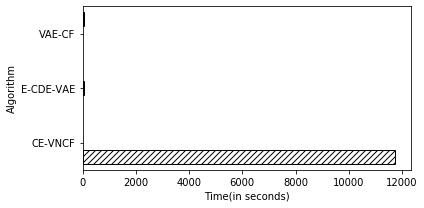

In [6]:
pandas_bar_plot(df=beer_runtime, x='Train Time', y='Algorithm', hue='Algorithm', x_name='Time(in seconds)', y_name='Algorithm', folder='beer', name='beer_runtime', save=True)

/home/kai/git/Dual-Encoder/utils/io.py:18: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(stream)[key]


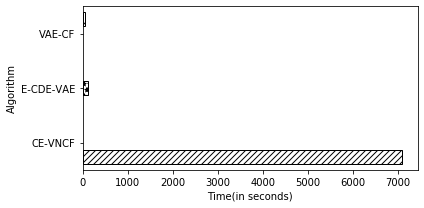

In [7]:
pandas_bar_plot(df=CDsVinyl_runtime, x='Train Time', y='Algorithm', hue='Algorithm', x_name='Time(in seconds)', y_name='Algorithm', folder='CDsVinyl', name='CDsVinyl_runtime', save=True)